In [ ]:
import pandas as pd
import numpy as np
from alpha_vantage.timeseries import TimeSeries
import Time

In [3]:
nifty=pd.read_csv('nifty50.csv')
bnifty=pd.read_csv('banknifty.csv')

In [4]:
nifty['daily_return']=nifty['Close']-nifty['Close'].shift(1)-1
nifty['pct_change']=nifty['Close'].pct_change(1)

In [5]:
bnifty['daily_return']=bnifty['Close']-bnifty['Close'].shift(1)-1
bnifty['pct_change']=bnifty['Close'].pct_change(1)

In [6]:
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),daily_return,pct_change
0,03-Sep-2019,10960.95,10967.50,10772.70,10797.90,483038985,16595.60,NaN,NaN
1,04-Sep-2019,10790.40,10858.75,10746.35,10844.65,508784352,19195.10,45.75,0.004330
2,05-Sep-2019,10860.95,10920.10,10816.00,10847.90,595699267,18279.88,2.25,0.000300
3,06-Sep-2019,10883.80,10957.05,10867.45,10946.20,497214445,18167.78,97.30,0.009062
4,09-Sep-2019,10936.70,11028.85,10889.80,11003.05,412471067,14762.07,55.85,0.005194


In [7]:
nifty.drop(['Open','High','Low','Shares Traded','Turnover (Rs. Cr)'],axis=1,inplace=True)

In [8]:
bnifty.drop(['Open','High','Low','Shares Traded','Turnover (Rs. Cr)'],axis=1,inplace=True)

In [9]:
nifty.columns=['date','nclose','ndaily_return','npct_change']

In [10]:
bnifty.columns=['date','bclose','bdaily_return','bpct_change']

In [11]:
bnifty.head(2)

,date,bclose,bdaily_return,bpct_change
0,03-Sep-2019,26824.15,NaN,NaN
1,04-Sep-2019,27123.85,298.7,0.011173


In [12]:
spread1=pd.concat([nifty,bnifty],axis=1,join='inner')

In [13]:
spread1.head(2)

,date,nclose,ndaily_return,npct_change,date,bclose,bdaily_return,bpct_change
0,03-Sep-2019,10797.90,NaN,NaN,03-Sep-2019,26824.15,NaN,NaN
1,04-Sep-2019,10844.65,45.75,0.00433,04-Sep-2019,27123.85,298.7,0.011173


In [14]:
spread=spread1.iloc[:,1:]

In [15]:
spread.head(2)

,nclose,ndaily_return,npct_change,date,bclose,bdaily_return,bpct_change
0,10797.90,NaN,NaN,03-Sep-2019,26824.15,NaN,NaN
1,10844.65,45.75,0.00433,04-Sep-2019,27123.85,298.7,0.011173


In [16]:
spread['spread'] = spread['ndaily_return']-spread['bdaily_return']

In [17]:
spread.head()

,nclose,ndaily_return,npct_change,date,bclose,bdaily_return,bpct_change,spread
0,10797.90,NaN,NaN,03-Sep-2019,26824.15,NaN,NaN,NaN
1,10844.65,45.75,0.004330,04-Sep-2019,27123.85,298.70,0.011173,-252.95
2,10847.90,2.25,0.000300,05-Sep-2019,26919.70,-205.15,-0.007527,207.40
3,10946.20,97.30,0.009062,06-Sep-2019,27247.90,327.20,0.012192,-229.90
4,11003.05,55.85,0.005194,09-Sep-2019,27504.65,255.75,0.009423,-199.90


In [18]:
import matplotlib.pyplot as plt

In [19]:
y=spread['spread']
x=spread['date']

In [20]:
spread['spread'].describe()

count     234.000000
mean       21.924573
std       433.648042
min     -1654.500000
25%      -214.825000
50%       -18.050000
75%       228.425000
max      2264.750000
Name: spread, dtype: float64

In [21]:
m=spread['spread'].mean()
std=spread['spread'].std()

In [22]:
s1=m+std
s2=m+(2*std)
s3=m+(3*std)
print('s1',s1,'s2',s2,'s3',s3)
ns1=m-std
ns2=m-(2*std)
ns3=m-(3*std)
print('ns1',ns1,'ns2',ns2,'ns3',ns3)

s1 455.5726149327088 s2 889.220657215845 s3 1322.868699498981
ns1 -411.72346963356347 ns2 -845.3715119166995 ns3 -1279.0195541998357


In [23]:
spread['spread'].median()

-18.050000000002

In [30]:
spread['5min_ema']=y.rolling(window=5).mean()
spread['12min_ema']=y.rolling(window=12).mean()

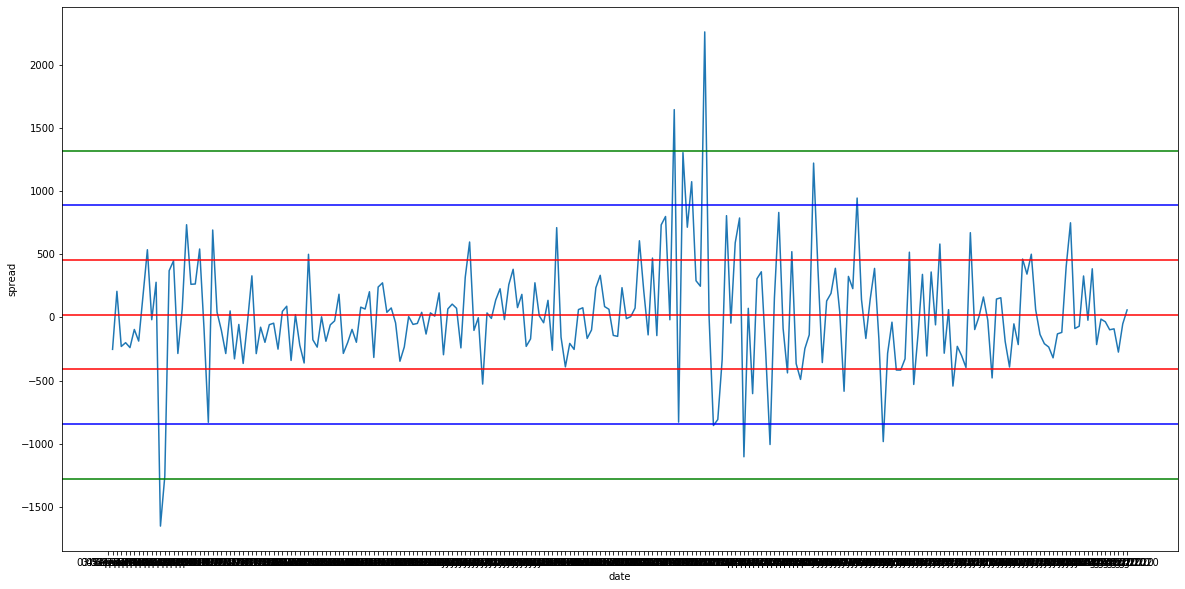

In [24]:
plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.axhline(m,color='r',linestyle='-')
plt.axhline(s1,color='r',linestyle='-',label='s1')
plt.axhline(s2,color='b',linestyle='-',label='s2')
plt.axhline(s3,color='g',linestyle='-',label='s3')
plt.axhline(ns1,color='r',linestyle='-',label='ns1')
plt.axhline(ns2,color='b',linestyle='-',label='ns2')
plt.axhline(ns3,color='g',linestyle='-',label='ns3')
plt.xlabel('date')
plt.ylabel('spread')
plt.show()

In [ ]:
if y>s2:
    print('trade')